In [40]:
using Pkg
Pkg.activate("/home/users/shubhgup/Codes/Julia/TISExperiments.jl")

  Activating environment at `~/Codes/Julia/TISExperiments.jl/Project.toml`


In [41]:
using Revise

In [42]:
using POMDPs, POMDPGym, POMDPSimulators, POMDPPolicies, Distributions
using BSON
using SARSOP, Random
using POMCPOW
using BeliefUpdaters
using ParticleFilters
using FileIO
using TISExperiments
using POMDPGifs
using D3Trees
# using Interact
using TreeImportanceSampling
include("gridworld_mdp.jl")

In [43]:
using Plots
using ProgressMeter

In [44]:
adv_rewards, amdp = gen_gridworld_mdp(penalty_mul=1, maxT=20)

(Dict{SVector{2, Int64}, Float64}([10, 4] => 1.230999766183066, [6, 10] => 0.25268388016212295, [4, 5] => 0.4205550987639115, [6, 8] => 1.2270422445234832, [2, 3] => 0.42176969965313926, [10, 3] => 0.5639741650275885, [9, 6] => 1.7603781636265028, [5, 1] => 1.9178517526594696, [4, 2] => 1.204595160532766, [8, 7] => 0.2313753293494889…), RMDP{SVector{2, Int64}, Symbol}
  amdp: GridWorldMDP
  π: NoisyGridWorldPolicy NoisyGridWorldPolicy()
  cost_fn: costfn (function of type var"#costfn#35")
  include_time_in_state: Bool false
  dt: Int64 1
  maxT: Int64 20
  disturbance_type: Symbol action
)

In [45]:
# fixed_s = rand(initialstate(amdp))
fixed_s = SVector(4, 9)

2-element SVector{2, Int64} with indices SOneTo(2):
 4
 9

In [46]:
actions(amdp, fixed_s)

GenericDiscreteNonParametric([:up, :down, :left, :right], DiscreteNonParametric{Int64, Float64, Vector{Int64}, Vector{Float64}}(support=[1, 2, 3, 4], p=[0.003333333333333336, 0.003333333333333336, 0.003333333333333336, 0.99]))

In [48]:
N = 10_000

treeis_params = TreeImportanceSampling.TreeISParams(0.0, 1e-3, 0.0, 0.0, 1.0, 1e-6)

baseline = false
base_continue = false

path = "data/pendulum_topple";

if base_continue
    baseline_costs = load("$(path)_baseline_$(N).jld2")["risks"]
else
    baseline_costs = []
end


Any[]

In [50]:
# simulate(HistoryRecorder(), amdp, FunctionPolicy((s) -> rand(actions(amdp, s))), fixed_s)

In [51]:
function heatmap_plot!(p, costs)
    xs = [i for i=1:10]
    ys = [i for i=1:10]
    C = fill(NaN, 10, 10)
    max_cost = max(values(costs)...)
    min_cost = min(values(costs)...)
    for (key, value) in costs
#         if 45<value<55
#             value = 1.5
#         elseif 95<value<105
#             value = 2
#         end
        C[key[1], key[2]] = value
    end
    heatmap!(p, xs, ys, C, clims=(min_cost, max_cost), c=:jet, alpha=0.3)
end

heatmap_plot! (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


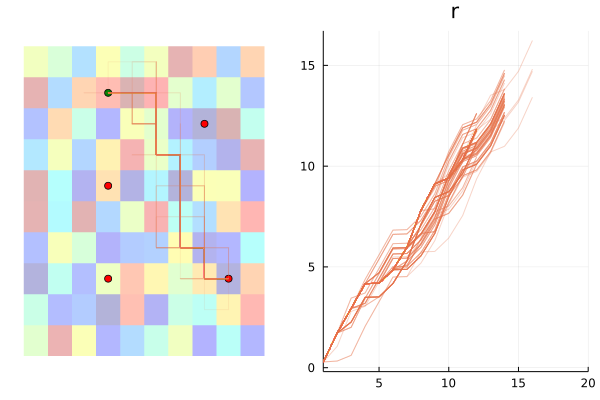

In [52]:
function plot_path(history; plots = [], idx=1)
    
    if length(plots)==0
        p = plot(xlim=(0, 11), ylim=(0, 11), legend=false, grid = false, axis=([], false))
        heatmap_plot!(p, adv_rewards)
        scatter!(p, [history[1].s[1]], [history[1].s[2]], color=:green)
        for s_term in amdp.amdp.g.terminate_from
            scatter!(p, [s_term[1]], [s_term[2]], color=:red)
        end
        push!(plots, p)
        
        p = plot(xlim = (1, amdp.maxT), title = "r", legend=false)
        push!(plots, p)
    end
    
    xs = [step.s[1] for step in history]
    ys = [step.s[2] for step in history]
    costs_l = cumsum([step.r for step in history])
#     @show xs, ys, costs_l
    plot!(plots[1], xs, ys, alpha=0.1, color=idx)
    
    plot!(plots[2], costs_l, alpha=0.3, color=idx)
    
    
    return plots
end
plots = []

@showprogress for i=1:1000
    history = simulate(HistoryRecorder(), amdp, FunctionPolicy((s) -> rand(actions(amdp, s))), fixed_s);
    plots = plot_path(history; plots=plots, idx=2)
end
plot(plots...)

In [21]:
baseline_costs = gen_baseline_costs(amdp, fixed_s; N=10_000, N_seeds=10);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


10×10000 Matrix{Float64}:
 11.841  11.841   11.841   10.0915  …  11.841   11.841   11.841  11.841
 11.841  11.841   11.841   11.841      11.841   11.841   11.841  11.841
 11.841  11.841   11.841   11.841      13.3391  11.841   11.841  11.841
 11.841  11.841   11.166   11.841      11.841   11.841   11.841  11.166
 11.841  11.841   11.841   11.841      11.841   11.841   11.841  11.841
 11.841  12.2597  11.841   11.841   …  11.841   11.841   11.841  11.841
 11.841  11.841   11.841   11.841      11.841   12.6853  11.841  11.841
 11.841  11.841   11.841   11.841      11.841   11.841   11.841  11.841
 11.841  11.841   11.841   11.841      11.841   12.0468  11.841  11.841
 11.841  11.841   14.9932  11.841      11.841   11.841   11.841  14.9932

In [ ]:
# p = histogram(plot_costs[1][2], label="$(plot_costs[1][1])", alpha=0.4, bins=100)
# for x in plot_costs[end:end]
#     histogram!(x[2], label="$(x[1])", alpha=0.4, bins=100)
# end
# p
max_cost = max(baseline_costs...)
histogram(baseline_costs, alpha=0.5, label="w/ disturbance", bins=0:max_cost/100:max_cost)
# histogram!(baseline_costs_1, alpha=0.5, label="w/o disturbance", bins=1:6:600)

In [ ]:
# treeis_costs, treeis_logwts, stored_tree = update_treeis(amdp, fixed_s, treeis_params; N=1000, stored_tree=stored_tree);
treeis_costs, treeis_weights = gen_treeis_costs(amdp, fixed_s, treeis_params; N=N, N_seeds=10)

"$(strategy_text) strategy" = "VaR strategy"


Progress: 100%|█████████████████████████████████████████| Time: 0:00:34


"$(strategy_text) strategy" = "VaR strategy"


Progress: 100%|█████████████████████████████████████████| Time: 0:00:34


"$(strategy_text) strategy" = "VaR strategy"


Progress: 100%|█████████████████████████████████████████| Time: 0:00:33


"$(strategy_text) strategy" = "VaR strategy"


Progress:  46%|███████████████████                      |  ETA: 0:00:18

In [59]:
lookup = TreeImportanceSampling.mdp_state_lookup(stored_tree[2])
# plots = []
@showprogress for i=1:1000
    history = simulate(HistoryRecorder(), amdp, FunctionPolicy((s) -> TreeImportanceSampling.tree_policy(stored_tree[2], s, lookup; params=treeis_params)), fixed_s);
    plots = plot_path(history; plots=plots, idx=3)
end
plot(plots...)
# planner.tree.cdf_est
# planner.tree.total_n
# planner.mdp.costs

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


In [ ]:
D3Tree(planner.tree.dpw_tree)

In [ ]:
plot(planner.mdp.IS_weights)

In [ ]:
tis_range = (1, length(tis_output[1]))
histogram(baseline_costs[tis_range[1]:tis_range[2]], alpha=0.5, label="MC", bins=0:1:100)
histogram!(planner.mdp.costs[tis_range[1]:tis_range[2]], alpha=0.5, label="Tree IS", bins=0:1:100)
# ylims!(0, 100)

In [ ]:

# print("Baseline metrics")

# TISExperiments.evaluate_metrics(baseline_costs; alpha_list=[1e-3])

# print("\nTIS metrics: N=$(N), c=$(c), α=$(α), β=$(β)), γ=$(γ)")

# TISExperiments.evaluate_metrics(tis_output[1][tis_range[1]:tis_range[2]]; weights=exp.(tis_output[3][tis_range[1]:tis_range[2]]), alpha_list=[1e-3])

# if baseline
# save("$(path)_baseline_$(N).jld2", Dict("risks" => baseline_costs, "states" => []))
# # else
# #     save("$(path)_mcts_IS_$(N).jld2", Dict("risks" => results_tis[1], "states" => results_tis[2], "IS_weights" => results_tis[3], "tree" => results_tis[4]))
# # end

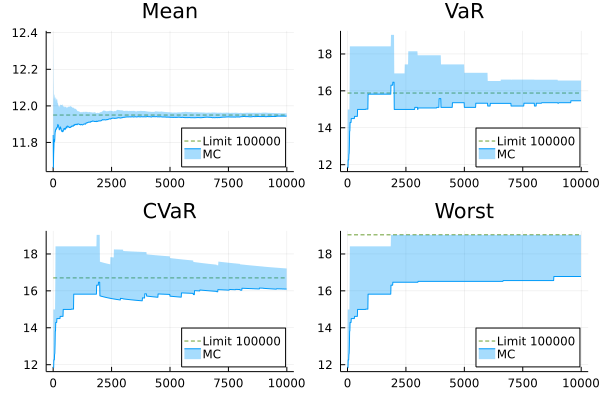

In [37]:
plots = TISExperiments.plot_metrics(baseline_costs, "MC", 1)
plots = TISExperiments.plot_metrics(treeis_costs, "Tree IS", 2; weights=treeis_weights, plots=plots)
plot(plots...)

In [ ]:
TISExperiments.plot_metrics([baseline_costs, baseline_costs, tis_output[1]]; weights_l=[nothing, nothing, exp.(tis_output[3])], range_l = tis_range, alpha=1e-3, names=["Limit", "MC", "Tree IS"], N_list = [2^i for i=1:10])